In [11]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
path = kagglehub.dataset_download("iamsouravbanerjee/software-professional-salaries-2022")
print("Path to dataset files:", path)

csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
csv_path = os.path.join(path, csv_files[0])

df = pd.read_csv(csv_path)

Using Colab cache for faster access to the 'software-professional-salaries-2022' dataset.
Path to dataset files: /kaggle/input/software-professional-salaries-2022


In [12]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location
0,3.8,Sasken,Android Developer,400000,3,Bangalore
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22774 entries, 0 to 22773
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22774 non-null  float64
 1   Company Name       22773 non-null  object 
 2   Job Title          22774 non-null  object 
 3   Salary             22774 non-null  int64  
 4   Salaries Reported  22774 non-null  int64  
 5   Location           22774 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB


In [14]:
df.isnull().sum()

,0
Rating,0
Company Name,1
Job Title,0
Salary,0
Salaries Reported,0
Location,0


In [15]:
df['Company Name'] = df['Company Name'].fillna(df['Company Name'].mode()[0])

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns to encode:", list(categorical_cols))

Categorical columns to encode: ['Company Name', 'Job Title', 'Location']


In [17]:
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Categorical columns encoded successfully.")
print("Updated DataFrame head after encoding:")
df.head()

Categorical columns encoded successfully.
Updated DataFrame head after encoding:


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location
0,3.8,8131,28,400000,3,0
1,4.5,417,28,400000,3,0
2,4.0,9779,28,1000000,3,0
3,3.8,8535,28,300000,3,0
4,4.4,884,28,600000,3,0


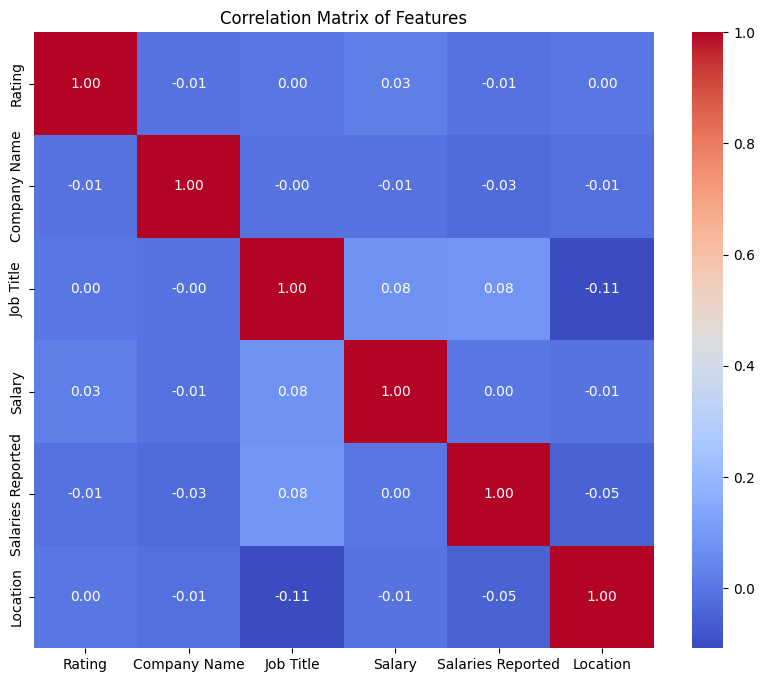

In [18]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [19]:
X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully.
X_train shape: (18219, 5)
X_test shape: (4555, 5)
y_train shape: (18219,)
y_test shape: (4555,)


In [20]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

    print(f"{name} - MAE: {mae:.2f}")
    print(f"{name} - MSE: {mse:.2f}")
    print(f"{name} - R2 Score: {r2:.2f}")



--- Training Linear Regression ---
Linear Regression - MAE: 428893.69
Linear Regression - MSE: 385383669119.54
Linear Regression - R2 Score: 0.01

--- Training Random Forest Regressor ---
Random Forest Regressor - MAE: 401759.82
Random Forest Regressor - MSE: 409904263151.05
Random Forest Regressor - R2 Score: -0.05

--- Training Gradient Boosting Regressor ---
Gradient Boosting Regressor - MAE: 379231.48
Gradient Boosting Regressor - MSE: 327823251103.82
Gradient Boosting Regressor - R2 Score: 0.16


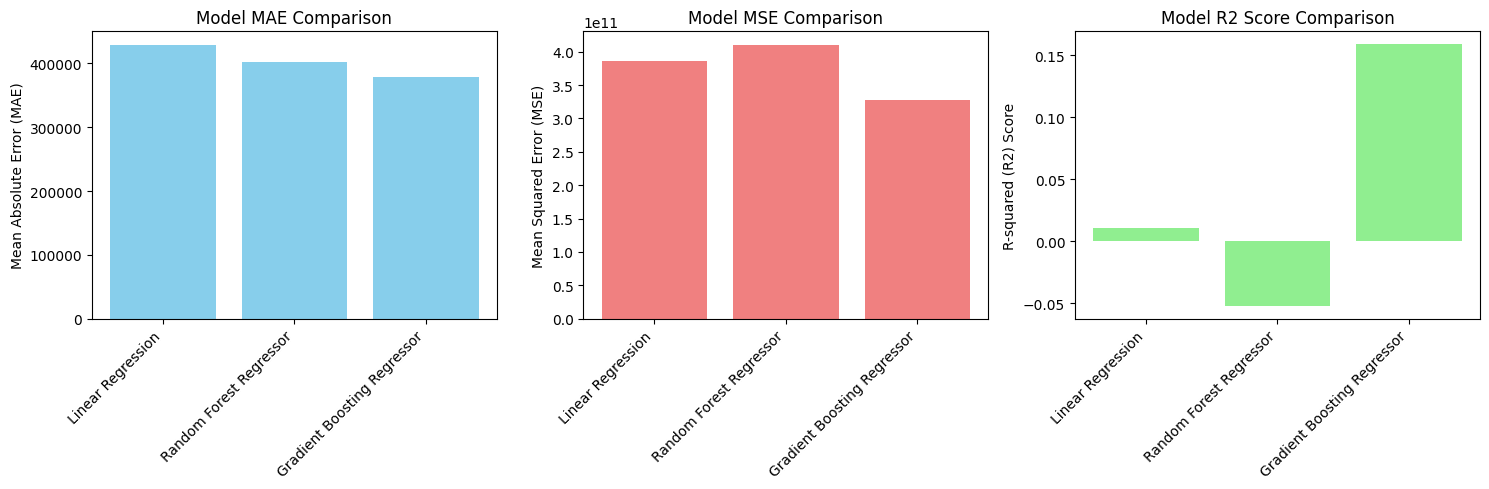

In [21]:
model_names = list(results.keys())
mae_scores = [results[name]['MAE'] for name in model_names]
mse_scores = [results[name]['MSE'] for name in model_names]
r2_scores = [results[name]['R2'] for name in model_names]

x = range(len(model_names))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(x, mae_scores, color='skyblue')
plt.xticks(x, model_names, rotation=45, ha='right')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model MAE Comparison')

plt.subplot(1, 3, 2)
plt.bar(x, mse_scores, color='lightcoral')
plt.xticks(x, model_names, rotation=45, ha='right')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model MSE Comparison')

plt.subplot(1, 3, 3)
plt.bar(x, r2_scores, color='lightgreen')
plt.xticks(x, model_names, rotation=45, ha='right')
plt.ylabel('R-squared (R2) Score')
plt.title('Model R2 Score Comparison')

plt.tight_layout()
plt.show()
